### California's COVID rate is now twice that of Florida's despite mask mandates

https://www.foxnews.com/us/masked-california-covid-rate-twice-florida?utm_id=41721&sfmc_id=3444094

COVID data: https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36

Population data: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage

In [152]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
client = Socrata("data.cdc.gov", None)

In [3]:
df_fl = client.get("9mfq-cb36", state="FL")
len(df_fl)

659

In [4]:
df_ca = client.get("9mfq-cb36", state="CA")
len(df_ca)

659

In [147]:
select_cols = ["submission_date", "state", "tot_cases", "new_case", "tot_death","new_death"]
number_cols = ["tot_cases", "new_case", "tot_death","new_death"]

In [177]:
dff = pd.DataFrame.from_records(df_fl).sort_values("submission_date")
dff

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
287,2020-01-22T00:00:00.000,FL,0,0,NaN,0,0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
119,2020-01-23T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
90,2020-01-24T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
211,2020-01-25T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
639,2020-01-26T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...
124,2021-11-06T00:00:00.000,FL,3660913,1523.0,298,60418,0.0,0,2021-11-06T00:00:00.000,Not agree,Not agree
524,2021-11-07T00:00:00.000,FL,3661182,269.0,86,60418,0.0,0,2021-11-08T15:35:12.187,Not agree,Not agree
568,2021-11-08T00:00:00.000,FL,3662957,1775.0,500,60418,0.0,0,2021-11-09T15:49:35.085,Not agree,Not agree
48,2021-11-09T00:00:00.000,FL,3664403,1446.0,594,60418,0.0,0,2021-11-10T15:25:35.567,Not agree,Not agree


In [175]:
dfc = pd.DataFrame.from_records(df_ca).sort_values("submission_date")
dfc

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
452,2020-01-22T00:00:00.000,CA,0,0.0,0,0,0,0,NaN,NaN,0,0,2020-01-24T00:00:00.000,Agree,Not agree
460,2020-01-23T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-25T00:00:00.000,Agree,Not agree
651,2020-01-24T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-26T00:00:00.000,Agree,Not agree
579,2020-01-25T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-27T00:00:00.000,Agree,Not agree
375,2020-01-26T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-28T00:00:00.000,Agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2021-11-06T00:00:00.000,CA,4937188,4688285.0,248903,0.0,0,71852,NaN,NaN,0.0,0,2021-11-08T13:55:23.618,Agree,Not agree
591,2021-11-07T00:00:00.000,CA,4937188,4688285.0,248903,0.0,0,71852,NaN,NaN,0.0,0,2021-11-08T15:35:12.187,Agree,Not agree
556,2021-11-08T00:00:00.000,CA,4956081,4707178.0,248903,18893.0,0,71979,NaN,NaN,127.0,0,2021-11-09T15:49:35.085,Agree,Not agree
133,2021-11-09T00:00:00.000,CA,4960026,4711123.0,248903,3945.0,0,71998,NaN,NaN,19.0,0,2021-11-10T15:25:35.567,Agree,Not agree


In [157]:
def prepare_df(df):
    df = df.loc[:, select_cols]
    df.loc[:,"submission_date"] = pd.to_datetime(df.loc[:,"submission_date"])
    df.loc[:,number_cols] = df[number_cols].astype(float).astype(int)
    df.replace(0, np.nan, inplace=True)
    return df

In [178]:
dff = prepare_df(dff)
dff

,submission_date,state,tot_cases,new_case,tot_death,new_death
287,2020-01-22,FL,NaN,NaN,NaN,NaN
119,2020-01-23,FL,NaN,NaN,NaN,NaN
90,2020-01-24,FL,NaN,NaN,NaN,NaN
211,2020-01-25,FL,NaN,NaN,NaN,NaN
639,2020-01-26,FL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
124,2021-11-06,FL,3660913.0,1523.0,60418.0,NaN
524,2021-11-07,FL,3661182.0,269.0,60418.0,NaN
568,2021-11-08,FL,3662957.0,1775.0,60418.0,NaN
48,2021-11-09,FL,3664403.0,1446.0,60418.0,NaN


In [ ]:
dfc = prepare_df(dfc)
dfc

In [106]:
dfp = pd.read_csv("nst-est2019-alldata.csv", usecols=("SUMLEV", "STATE", "NAME", "POPESTIMATE2019"), dtype={"SUMLEV": str, "STATE": str, "NAME": str, "POPESTIMATE2019": int})
dfp.head(10)

,SUMLEV,STATE,NAME,POPESTIMATE2019
0,010,00,United States,328239523
1,020,00,Northeast Region,55982803
2,020,00,Midwest Region,68329004
3,020,00,South Region,125580448
4,020,00,West Region,78347268
5,040,01,Alabama,4903185
6,040,02,Alaska,731545
7,040,04,Arizona,7278717
8,040,05,Arkansas,3017804
9,040,06,California,39512223


In [18]:
dfp = dfp[(dfp["NAME"] == "California") | (dfp["NAME"] == "Florida")]
dfp

,SUMLEV,STATE,NAME,POPESTIMATE2019
9,040,06,California,39512223
14,040,12,Florida,21477737


In [19]:
pcal = 39512223
pflo = 21477737

In [171]:
def adjust_for_population(df, population):
    df2 = df.copy(deep=True)
    for colname in ("new_case", "new_death", "tot_cases", "tot_death"):
        new_colname = f"{colname}_per_100k"
        df2[new_colname] = df2.loc[:, colname] * 100000.0 / population
    return df2

In [172]:
dfcn = adjust_for_population(dfc, pcal)
dfcn

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
452,2020-01-22,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2020-01-23,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,2020-01-24,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,2020-01-25,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,2020-01-26,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
193,2021-11-06,CA,4937188.0,NaN,71852.0,NaN,NaN,NaN,12495.343530,181.847526
591,2021-11-07,CA,4937188.0,NaN,71852.0,NaN,NaN,NaN,12495.343530,181.847526
556,2021-11-08,CA,4956081.0,18893.0,71979.0,127.0,47.815584,0.321420,12543.159113,182.168946
133,2021-11-09,CA,4960026.0,3945.0,71998.0,19.0,9.984252,0.048086,12553.143365,182.217032


In [173]:
dffn = adjust_for_population(dff, pflo)
dffn

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
287,2020-01-22,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2020-01-23,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2020-01-24,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,2020-01-25,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,2020-01-26,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
124,2021-11-06,FL,3660913.0,1523.0,60418.0,NaN,7.091064,NaN,17045.152383,281.305242
524,2021-11-07,FL,3661182.0,269.0,60418.0,NaN,1.252460,NaN,17046.404842,281.305242
568,2021-11-08,FL,3662957.0,1775.0,60418.0,NaN,8.264372,NaN,17054.669214,281.305242
48,2021-11-09,FL,3664403.0,1446.0,60418.0,NaN,6.732553,NaN,17061.401767,281.305242


In [179]:
df = pd.concat([dfcn, dffn]).reset_index()
df

,index,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
0,452,2020-01-22,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,460,2020-01-23,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,651,2020-01-24,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,579,2020-01-25,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,375,2020-01-26,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1313,124,2021-11-06,FL,3660913.0,1523.0,60418.0,NaN,7.091064,NaN,17045.152383,281.305242
1314,524,2021-11-07,FL,3661182.0,269.0,60418.0,NaN,1.252460,NaN,17046.404842,281.305242
1315,568,2021-11-08,FL,3662957.0,1775.0,60418.0,NaN,8.264372,NaN,17054.669214,281.305242
1316,48,2021-11-09,FL,3664403.0,1446.0,60418.0,NaN,6.732553,NaN,17061.401767,281.305242


In [180]:
def draw_combined_chart(df, y_col, y_label, title):
    sns.set_style("whitegrid")
    sns.set_context("poster", font_scale=1)
    g = sns.lineplot(data=df, x="submission_date", y=y_col, hue="state")
    g.figure.set_figwidth(30)
    g.figure.set_figheight(10)
    plt.title(title)
    plt.xlabel('Submission date')
    plt.ylabel(y_label)

### Chart with absolute numbers

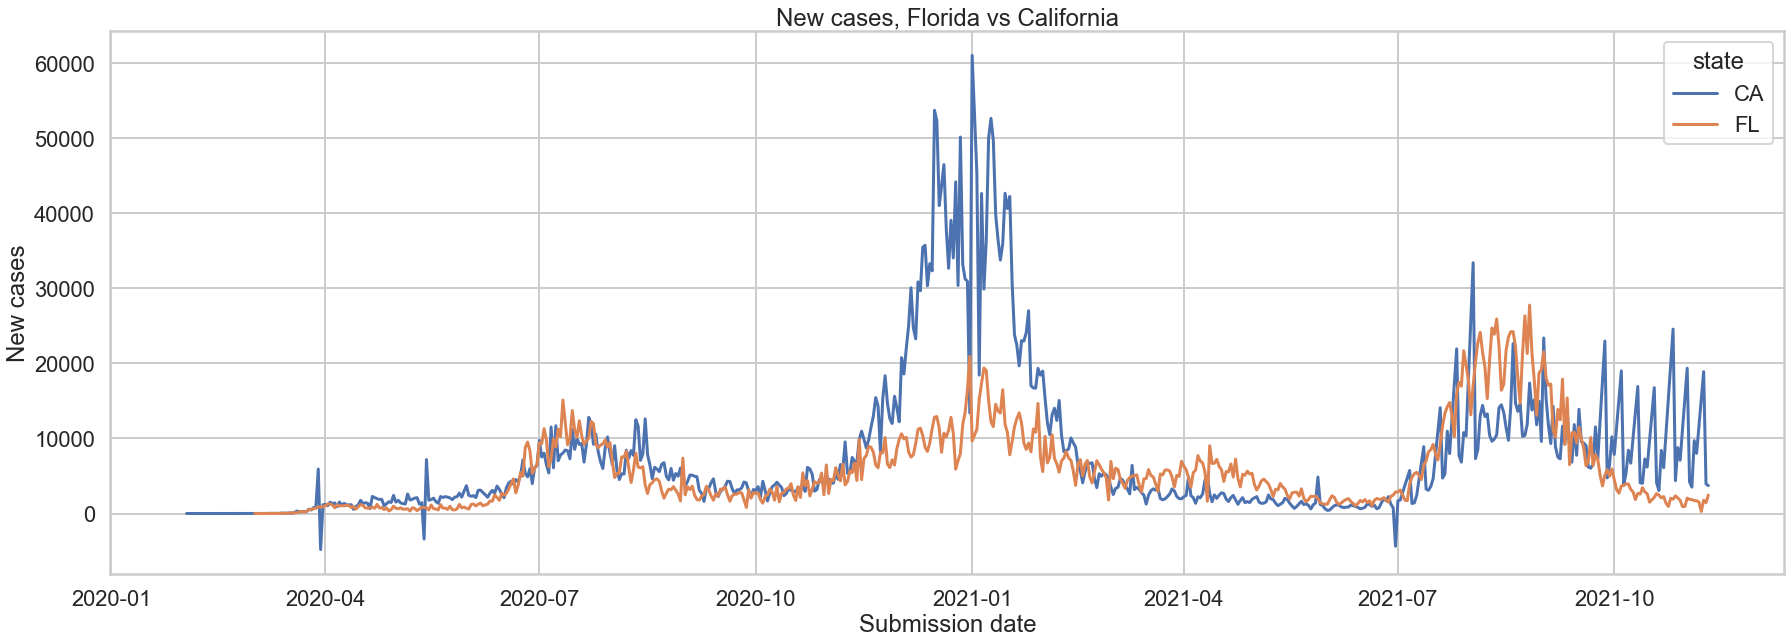

In [183]:
draw_combined_chart(df, "new_case", "New cases", "New cases, Florida vs California")

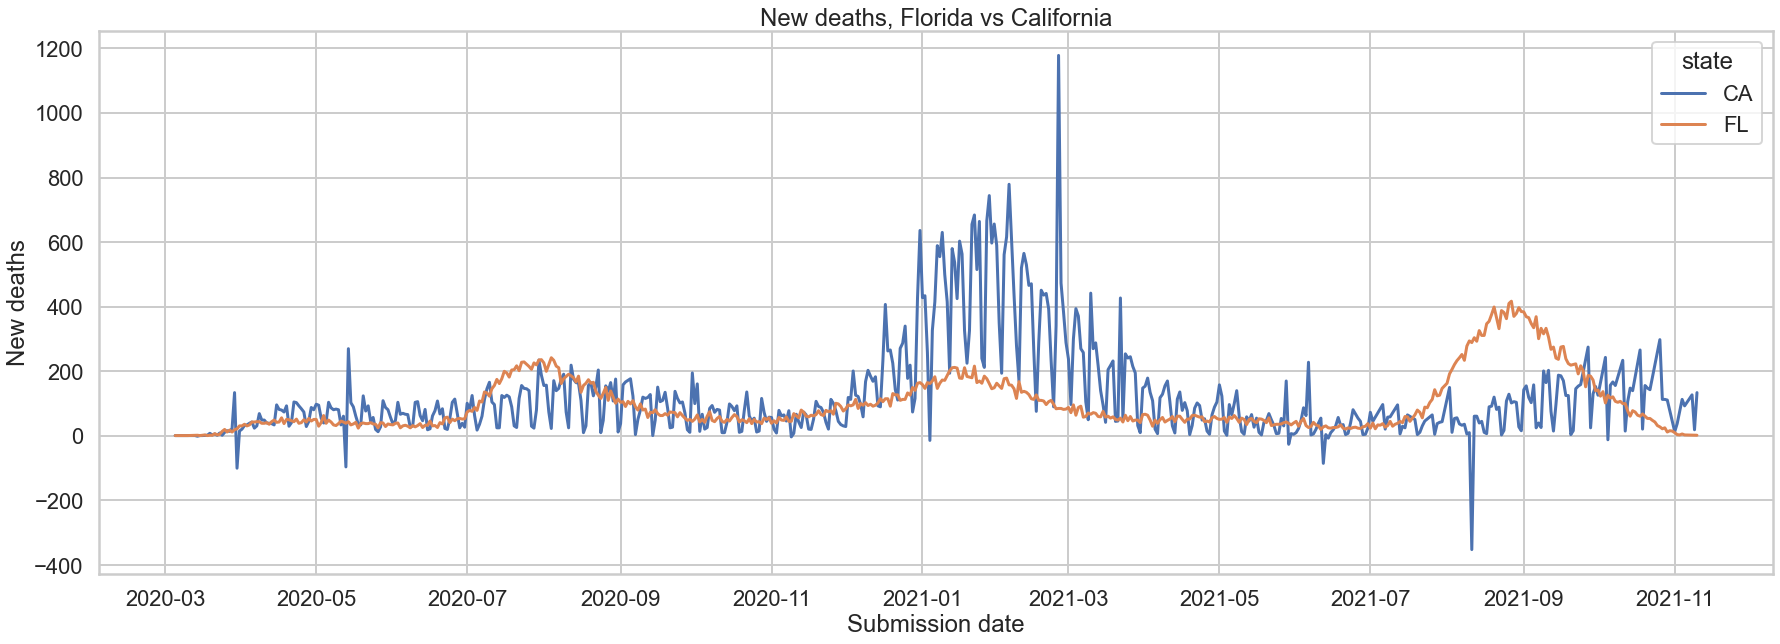

In [182]:
draw_combined_chart(df, "new_death", "New deaths", "New deaths, Florida vs California")

### Chart with normalized numbers

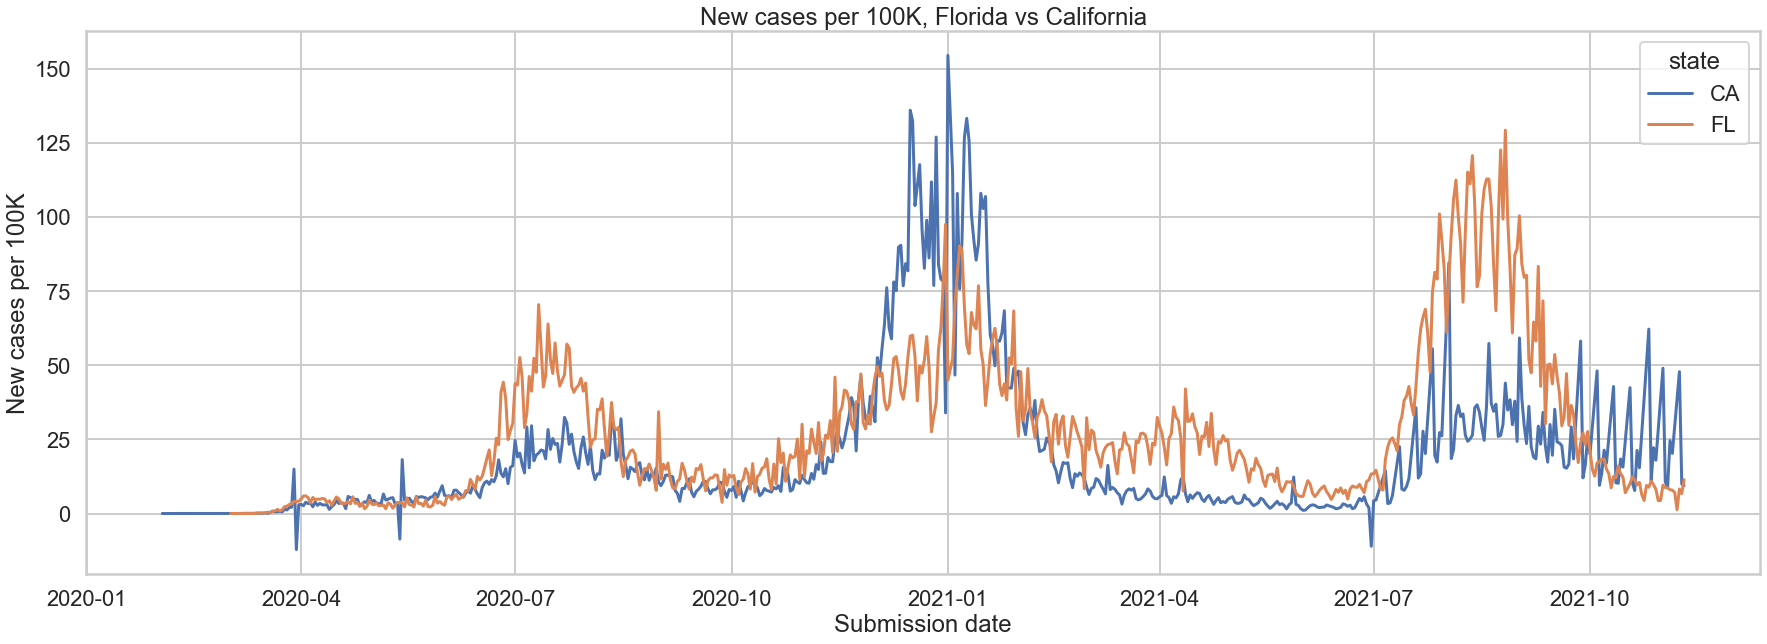

In [184]:
draw_combined_chart(df, "new_case_per_100k", "New cases per 100K", "New cases per 100K, Florida vs California")

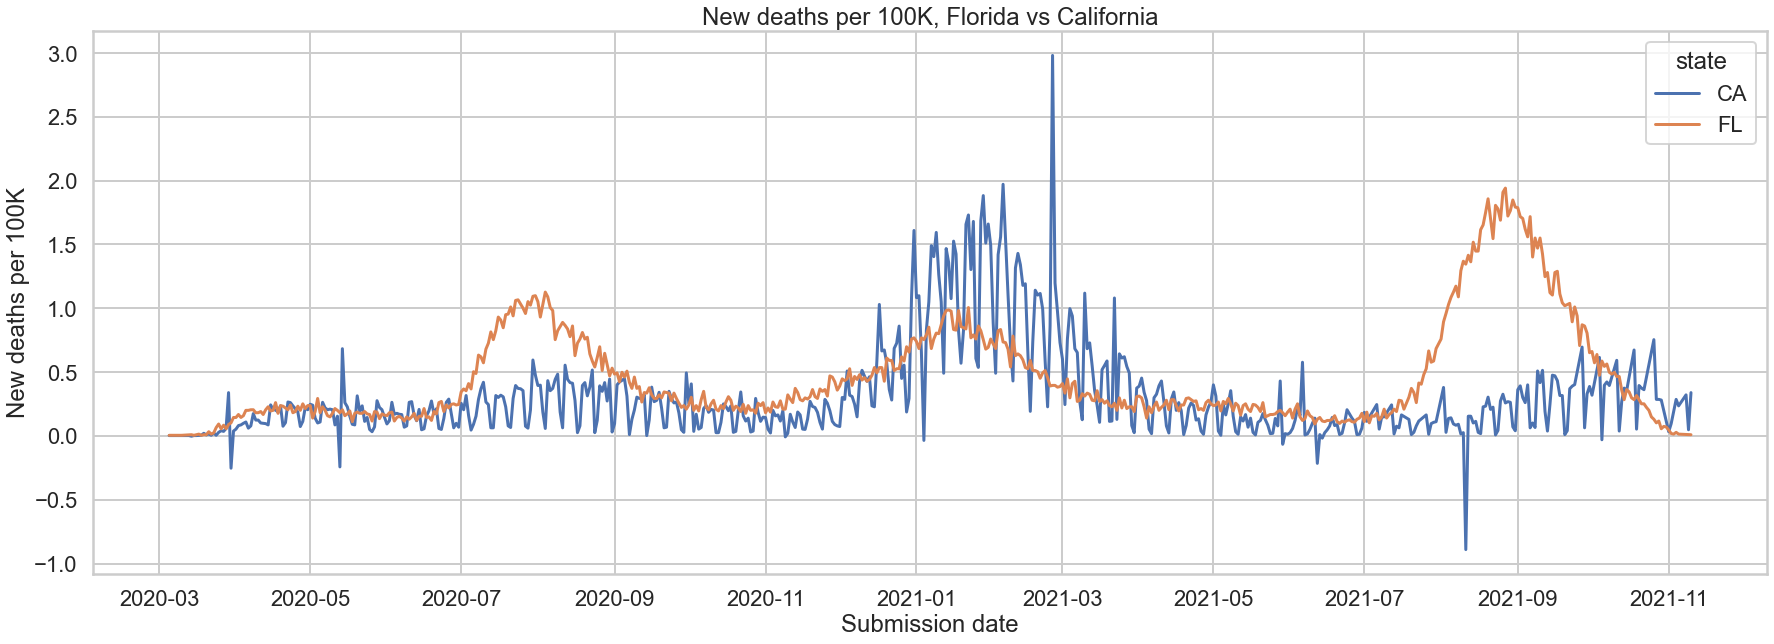

In [185]:
draw_combined_chart(df, "new_death_per_100k", "New deaths per 100K", "New deaths per 100K, Florida vs California")

In [186]:
def draw_stacked_chart(x_vector, y_vector1, y_vector2, vector_labels, ylabel, title):
    sns.set_style("whitegrid")
    sns.set_context("poster", font_scale=1)
    plt.figure(figsize=(30,10))
    plt.stackplot(x_vector, y_vector1, y_vector2, labels=vector_labels)
    plt.legend(loc='upper left')
    plt.xlabel('Submission date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

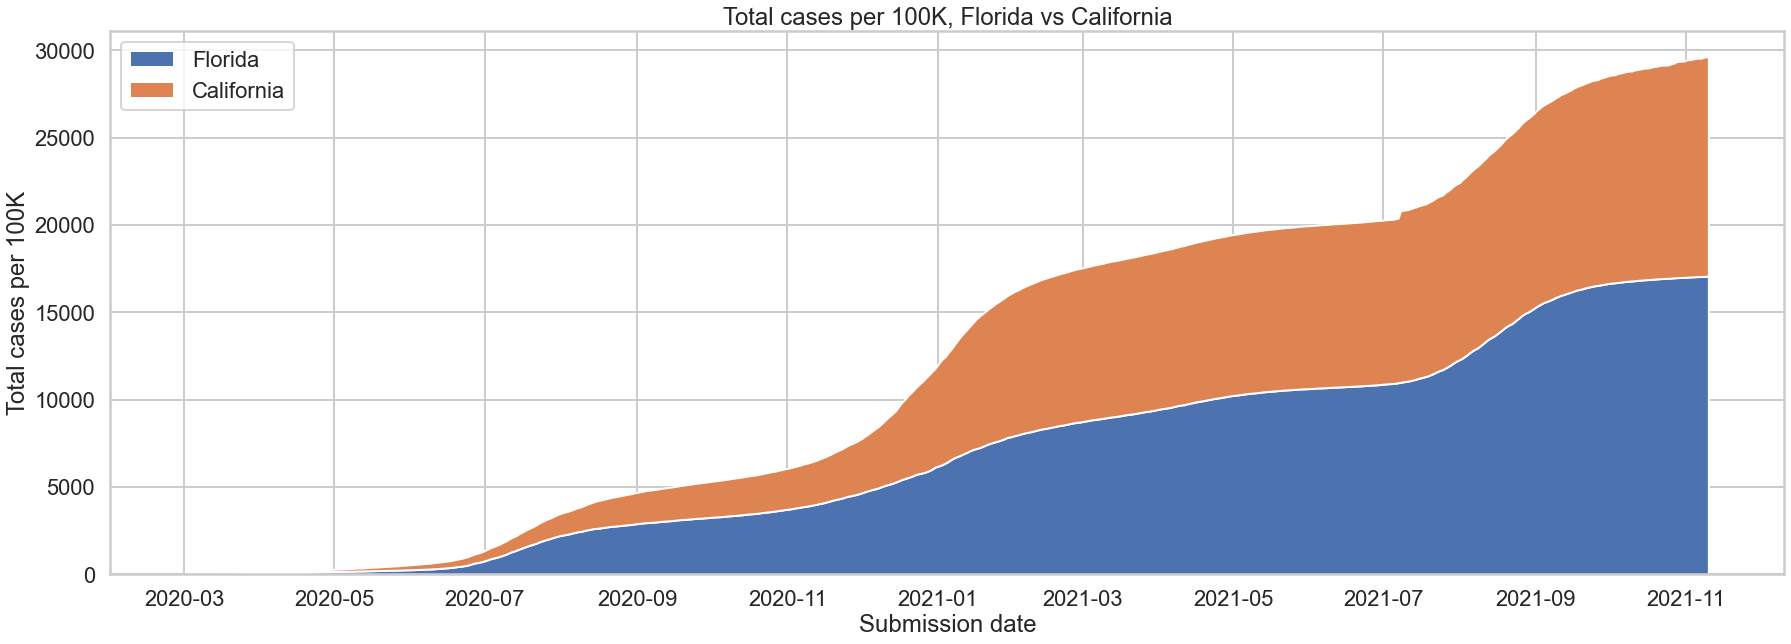

In [190]:
draw_stacked_chart(dff["submission_date"], dffn["tot_cases_per_100k"], dfcn["tot_cases_per_100k"], ["Florida", "California"], "Total cases per 100K", "Total cases per 100K, Florida vs California")

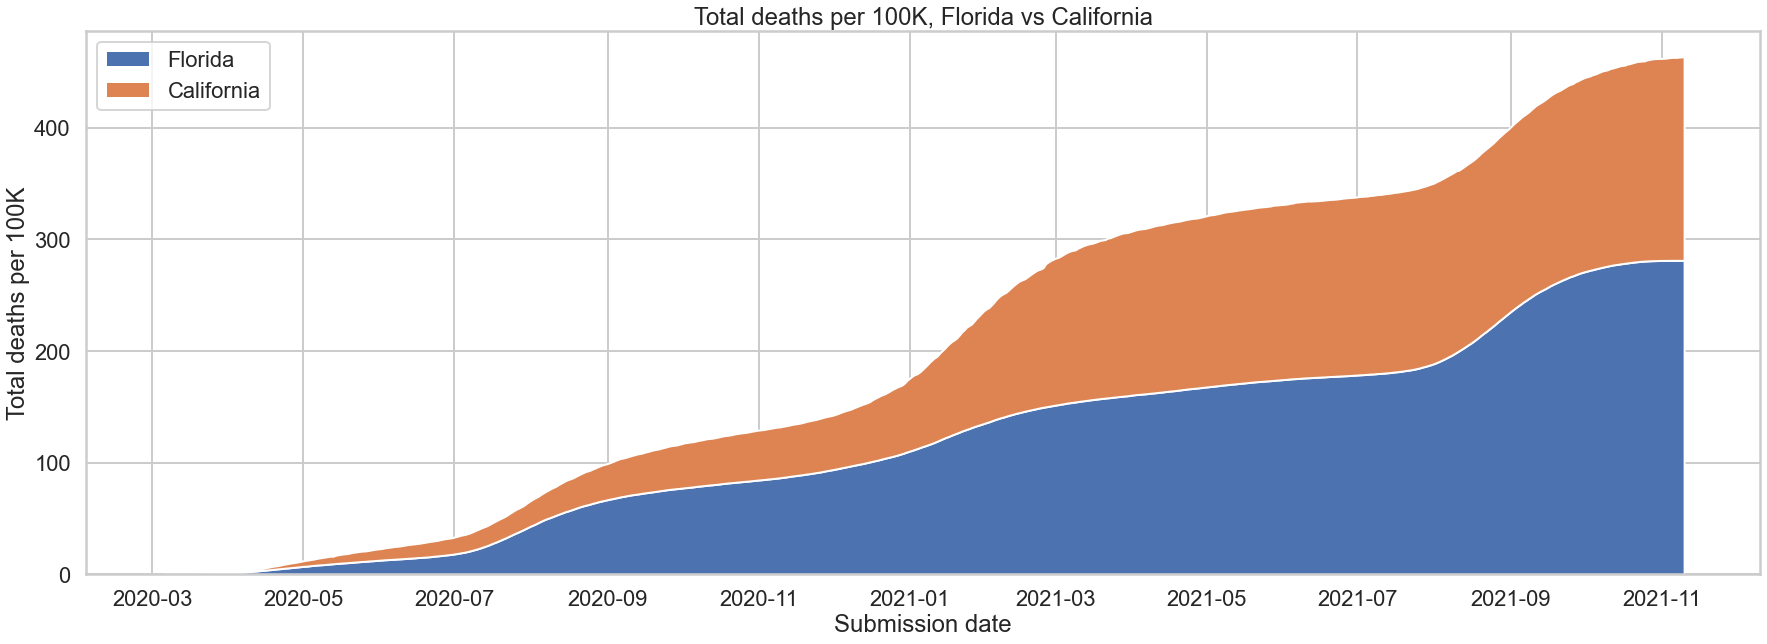

In [191]:
draw_stacked_chart(dff["submission_date"], dffn["tot_death_per_100k"], dfcn["tot_death_per_100k"], ["Florida", "California"], "Total deaths per 100K", "Total deaths per 100K, Florida vs California")

In [192]:
dfcn[dfcn.submission_date == "2021-11-10"]

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
626,2021-11-10,CA,4963742.0,3716.0,72132.0,134.0,9.404685,0.339136,12562.54805,182.556167


In [193]:
dffn[dffn.submission_date == "2021-11-10"]

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
490,2021-11-10,FL,3666858.0,2455.0,60420.0,2.0,11.430441,0.009312,17072.832208,281.314554
